In [5]:
import numpy as np
import tensorflow as tf

from magenta.models.sketch_rnn.model import sample, Model
from magenta.models.sketch_rnn.sketch_rnn_train import (
    download_pretrained_models, load_checkpoint, reset_graph
)
from magenta.models.sketch_rnn.utils import slerp, to_big_strokes, to_normal_strokes

from util.loaders import load_env, load_model
from util.misc import draw_strokes, get_start_and_end, make_grid_svg, StrokeHelper

In [16]:
model_dir = 'models/face'
[hps_model, eval_hps_model, sample_hps_model] = load_model(model_dir)

# construct model
reset_graph()
model = Model(hps_model)
eval_model = Model(eval_hps_model, reuse=True)
sample_model = Model(sample_hps_model, reuse=True)
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# load model checkpoint weights
load_checkpoint(sess, model_dir)

# initialize stroke encoder/decoder
helper = StrokeHelper(eval_model, sample_model, sess)

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Input dropout mode = False.
INFO:tensorflow:Output dropout mode = False.
INFO:tensorflow:Recurrent dropout mode = False.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Input dropout mode = False.
INFO:tensorflow:Output dropout mode = False.
INFO:tensorflow:Recurrent dropout mode = False.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Input dropout mode = False.
INFO:tensorflow:Output dropout mode = False.
INFO:tensorflow:Recurrent dropout mode = False.
INFO:tensorflow:Loading model models/face/vector-102000.
INFO:tensorflow:Restoring parameters from models/face/vector-102000


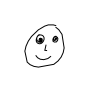

In [18]:
z_0 = np.random.randn(eval_model.hps.z_size)
_ = helper.decode(z_0)

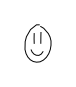

In [29]:
z_1 = np.random.randn(eval_model.hps.z_size)
_ = helper.decode(z_1)

In [30]:
drawings = []
for i, t in enumerate(np.linspace(0, 1, 10)):
    z_t = slerp(z_0, z_1, t)
    drawings.append([helper.decode(z_t, draw_mode=False, temperature=0.1), [0, i]])

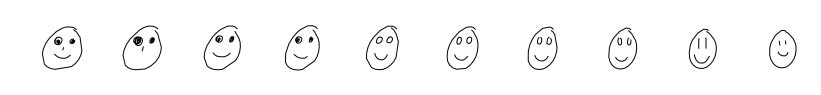

In [31]:
grid = make_grid_svg(drawings)
draw_strokes(grid)